In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from imblearn.combine import *
from imblearn.combine import *
from sklearn.metrics import classification_report
from imblearn.under_sampling import TomekLinks
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.model_selection import GridSearchCV
from sklearn.dummy import DummyClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import mean_squared_error
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn.metrics import confusion_matrix
from lightgbm import LGBMClassifier
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from bayes_opt import BayesianOptimization
from lightgbm import LGBMRegressor

In [2]:
human_train = pd.read_csv("work/human.csv", encoding="cp949")
human_new = pd.read_csv("work/human_new.csv", encoding="cp949")

In [3]:
# human_train

In [4]:
# human_train.info()

In [5]:
# human_train.isnull().sum()

In [6]:
# human_train["노동 계급"].value_counts()

In [7]:
# human_train["학력"].value_counts()

In [8]:
# human_train["혼인 상태"].value_counts()

In [9]:
# human_train["직업"].value_counts()

In [10]:
# human_train["관계"].value_counts()

In [11]:
# human_train["인종"].value_counts()

In [12]:
# human_train["모국"].value_counts()

In [13]:
# human_train["교육 수"].value_counts()

In [14]:
# human_train["자본 이득"].value_counts()

In [15]:
#  human_train["자본 손실"].value_counts()

In [16]:
# human_train["주당 시간"].value_counts()

# Null값 제거

In [4]:
human_train.dropna(subset=["노동 계급","직업","학력"],inplace=True)
human_train

,아이디,나이,노동 계급,fnlwgt,학력,교육 수,혼인 상태,직업,관계,인종,성별,자본 이득,자본 손실,주당 시간,모국
0,H20001,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,H20002,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,H20003,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,H20004,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,H20005,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,H52557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States
32557,H52558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States
32558,H52559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States
32559,H52560,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States


# 성별 수치형으로 변환

In [5]:
human_train[["성별"]] = human_train[["성별"]].apply(lambda x: x.str.lstrip())
human_train[["성별"]] = human_train[["성별"]].apply(lambda x: x.astype('category').cat.codes)

In [19]:
# human_train["성별"] = human_train["성별"].str.strip()

In [20]:
# gender = {"Male":1, "Female":0}
# human_train["성별"] = human_train["성별"].map(gender)

In [21]:
human_train["성별"].value_counts()

1    20788
0     9930
Name: 성별, dtype: int64

# 아웃라이어 제거

In [6]:
for i, v in enumerate(human_train['나이']):
    if v>70 :
        human_train['나이'].replace(v,70,inplace=True)

In [7]:
for i, v in enumerate(human_train['fnlwgt']):
    if v>400000 :
        human_train['fnlwgt'].replace(v,400000,inplace=True)

In [8]:
for i, v in enumerate(human_train['주당 시간']):
    if v>70 :
        human_train['주당 시간'].replace(v,70,inplace=True)

# 파생 변수 만들기

In [9]:
s1=human_train['자본 이득']
s2=human_train['자본 손실']
s=s1+s2
s.rename("순이익",inplace=True)
human_train = pd.concat([human_train,s],axis=1)

In [10]:
human_train['나이대'] = (human_train['나이']/10).astype(int)
human_train['주당 시간별'] = (human_train['주당 시간']/10).astype(int)
human_train['fnlwgt2'] = (human_train['fnlwgt']/10000).astype(int)

In [11]:
# working_class = pd.get_dummies(human_train["노동 계급"])
# human_train = pd.concat([human_train, working_class], axis=1)
# human_train.drop("노동 계급", axis=1, inplace=True)

human_train[["노동 계급"]] = human_train[["노동 계급"]].apply(lambda x: x.str.lstrip())
human_train[["노동 계급"]] = human_train[["노동 계급"]].apply(lambda x: x.astype('category').cat.codes)

In [12]:
# academic_ability = pd.get_dummies(human_train["학력"])
# human_train = pd.concat([human_train,academic_ability],axis=1)
# human_train.drop("학력",axis=1,inplace=True)

human_train[["학력"]] = human_train[["학력"]].apply(lambda x: x.str.lstrip())
human_train[["학력"]] = human_train[["학력"]].apply(lambda x: x.astype('category').cat.codes)

In [13]:
# marital_status = pd.get_dummies(human_train["혼인 상태"])
# human_train = pd.concat([human_train,marital_status], axis=1)
# human_train.drop("혼인 상태", axis=1, inplace=True)

human_train[["혼인 상태"]] = human_train[["혼인 상태"]].apply(lambda x: x.str.lstrip())
human_train[["혼인 상태"]] = human_train[["혼인 상태"]].apply(lambda x: x.astype('category').cat.codes)

In [14]:
# jobs = pd.get_dummies(human_train["직업"])
# human_train = pd.concat([human_train, jobs], axis=1)
# human_train.drop("직업", axis=1, inplace=True)

human_train[["직업"]] = human_train[["직업"]].apply(lambda x: x.str.lstrip())
human_train[["직업"]] = human_train[["직업"]].apply(lambda x: x.astype('category').cat.codes)

In [15]:
# relationship = pd.get_dummies(human_train["관계"])
# human_train = pd.concat([human_train, relationship], axis=1)
# human_train.drop("관계", axis=1, inplace=True)

human_train[["관계"]] = human_train[["관계"]].apply(lambda x: x.str.lstrip())
human_train[["관계"]] = human_train[["관계"]].apply(lambda x: x.astype('category').cat.codes)

In [16]:
# race = pd.get_dummies(human_train["인종"])
# human_train = pd.concat([human_train, race], axis=1)
# human_train.drop("인종", axis=1, inplace=True)

human_train[["인종"]] = human_train[["인종"]].apply(lambda x: x.str.lstrip())
human_train[["인종"]] = human_train[["인종"]].apply(lambda x: x.astype('category').cat.codes)

In [17]:
# homeland = pd.get_dummies(human_train["모국"])
# human_train = pd.concat([human_train, homeland], axis=1)
# human_train.drop("모국", axis=1, inplace=True)

human_train[["모국"]] = human_train[["모국"]].apply(lambda x: x.str.lstrip())
human_train[["모국"]] = human_train[["모국"]].apply(lambda x: x.astype('category').cat.codes)

In [18]:
human_train.drop(["자본 이득","자본 손실","순이익"],axis=1,inplace=True)

In [19]:
human_train.isnull().sum().sum()

0

나이            AxesSubplot(0.125,0.816017;0.352273x0.0639831)
노동 계급      AxesSubplot(0.547727,0.816017;0.352273x0.0639831)
fnlwgt        AxesSubplot(0.125,0.739237;0.352273x0.0639831)
학력         AxesSubplot(0.547727,0.739237;0.352273x0.0639831)
교육 수          AxesSubplot(0.125,0.662458;0.352273x0.0639831)
혼인 상태      AxesSubplot(0.547727,0.662458;0.352273x0.0639831)
직업            AxesSubplot(0.125,0.585678;0.352273x0.0639831)
관계         AxesSubplot(0.547727,0.585678;0.352273x0.0639831)
인종            AxesSubplot(0.125,0.508898;0.352273x0.0639831)
성별         AxesSubplot(0.547727,0.508898;0.352273x0.0639831)
주당 시간         AxesSubplot(0.125,0.432119;0.352273x0.0639831)
모국         AxesSubplot(0.547727,0.432119;0.352273x0.0639831)
나이대           AxesSubplot(0.125,0.355339;0.352273x0.0639831)
주당 시간별     AxesSubplot(0.547727,0.355339;0.352273x0.0639831)
fnlwgt2       AxesSubplot(0.125,0.278559;0.352273x0.0639831)
dtype: object

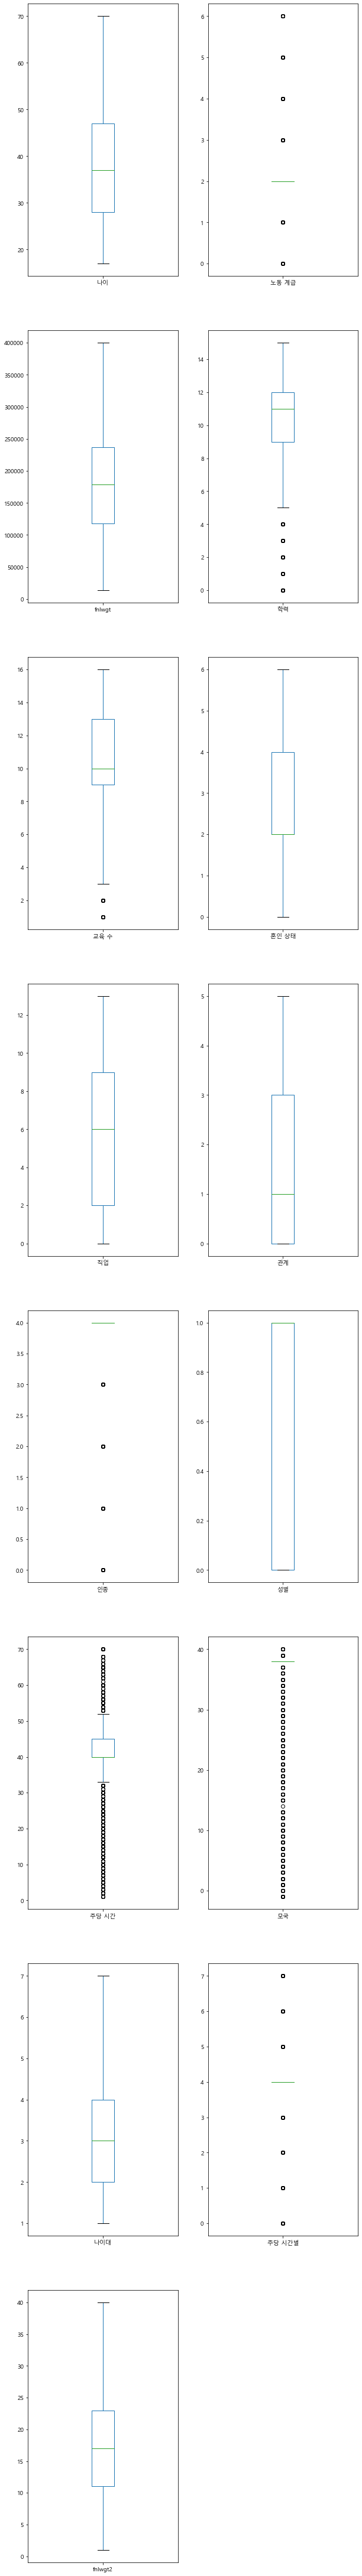

In [21]:
plt.rcParams['figure.figsize'] = [50, 50]
plt.rc('font', family='Malgun Gothic')
human_train.loc[:, '나이':'fnlwgt2'].plot.box(subplots=True, layout=(10,2), figsize=(10,100))

주당 시간별    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

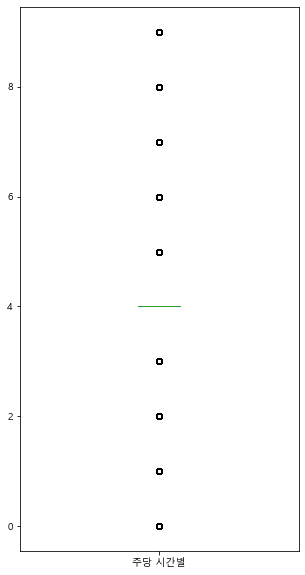

In [35]:
human_train.loc[:, '주당 시간별'].plot.box(subplots=True, layout=(1,1), figsize=(5,10))

In [22]:
human_train.loc[:,'주당 시간별'].describe().T

count    30718.000000
mean         3.924311
std          1.189654
min          0.000000
25%          4.000000
50%          4.000000
75%          4.000000
max          7.000000
Name: 주당 시간별, dtype: float64

In [37]:
human_train.loc[:,'주당 시간별'].value_counts()

4    17583
5     3799
3     3374
2     2088
6     1760
1     1063
7      435
0      294
8      189
9      133
Name: 주당 시간별, dtype: int64

In [23]:
human_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30718 entries, 0 to 32560
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   아이디      30718 non-null  object
 1   나이       30718 non-null  int64 
 2   노동 계급    30718 non-null  int8  
 3   fnlwgt   30718 non-null  int64 
 4   학력       30718 non-null  int8  
 5   교육 수     30718 non-null  int64 
 6   혼인 상태    30718 non-null  int8  
 7   직업       30718 non-null  int8  
 8   관계       30718 non-null  int8  
 9   인종       30718 non-null  int8  
 10  성별       30718 non-null  int8  
 11  주당 시간    30718 non-null  int64 
 12  모국       30718 non-null  int8  
 13  나이대      30718 non-null  int32 
 14  주당 시간별   30718 non-null  int32 
 15  fnlwgt2  30718 non-null  int32 
dtypes: int32(3), int64(4), int8(8), object(1)
memory usage: 2.0+ MB


# 데이터 나누기

In [20]:
htX = human_train.drop(["아이디","성별"], axis=1)
htY = human_train["성별"]

In [21]:
X_train, X_test, Y_train, Y_test = train_test_split(htX, htY, test_size=0.25, random_state=0)

In [22]:
htX.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30718 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   나이       30718 non-null  int64
 1   노동 계급    30718 non-null  int8 
 2   fnlwgt   30718 non-null  int64
 3   학력       30718 non-null  int8 
 4   교육 수     30718 non-null  int64
 5   혼인 상태    30718 non-null  int8 
 6   직업       30718 non-null  int8 
 7   관계       30718 non-null  int8 
 8   인종       30718 non-null  int8 
 9   주당 시간    30718 non-null  int64
 10  모국       30718 non-null  int8 
 11  나이대      30718 non-null  int32
 12  주당 시간별   30718 non-null  int32
 13  fnlwgt2  30718 non-null  int32
dtypes: int32(3), int64(4), int8(7)
memory usage: 1.7 MB


# Normalization

In [18]:
scaler = MinMaxScaler()
scaler.fit(htX)

MinMaxScaler()

In [19]:
x = scaler.transform(htX)
htX = pd.DataFrame(x, columns = htX.columns)

In [31]:
htX.describe().T

,count,mean,std,min,25%,50%,75%,max
나이,32561.0,0.295639,0.186855,0.0,0.150685,0.273973,0.424658,1.0
노동 계급,32561.0,0.483612,0.181995,0.0,0.500000,0.500000,0.500000,1.0
fnlwgt,32561.0,0.120545,0.071685,0.0,0.071679,0.112788,0.152651,1.0
학력,32561.0,0.686547,0.258018,0.0,0.600000,0.733333,0.800000,1.0
교육 수,32561.0,0.605379,0.171515,0.0,0.533333,0.600000,0.733333,1.0
...,...,...,...,...,...,...,...,...
Thailand,32561.0,0.000553,0.023506,0.0,0.000000,0.000000,0.000000,1.0
Trinadad&Tobago,32561.0,0.000584,0.024149,0.0,0.000000,0.000000,0.000000,1.0
United-States,32561.0,0.895857,0.305451,0.0,1.000000,1.000000,1.000000,1.0
Vietnam,32561.0,0.002058,0.045316,0.0,0.000000,0.000000,0.000000,1.0


# Standardization

In [23]:
scaler = StandardScaler()
scaler.fit(htX)
x = scaler.transform(htX)
htX = pd.DataFrame(x, columns=htX.columns)

In [24]:
htX.describe()

,나이,노동 계급,fnlwgt,학력,교육 수,혼인 상태,직업,관계,인종,주당 시간,모국,나이대,주당 시간별,fnlwgt2
count,3.071800e+04,3.071800e+04,3.071800e+04,3.071800e+04,3.071800e+04,3.071800e+04,3.071800e+04,3.071800e+04,3.071800e+04,3.071800e+04,3.071800e+04,3.071800e+04,3.071800e+04,3.071800e+04
mean,-1.807266e-16,2.389520e-16,4.776583e-17,3.629585e-16,-1.171376e-17,-7.561538e-17,-2.847662e-16,2.904116e-16,-2.086564e-15,-4.131152e-16,6.591547e-16,5.821750e-16,-3.501691e-16,-1.189592e-16
std,1.000016e+00,1.000016e+00,1.000016e+00,1.000016e+00,1.000016e+00,1.000016e+00,1.000016e+00,1.000016e+00,1.000016e+00,1.000016e+00,1.000016e+00,1.000016e+00,1.000016e+00,1.000016e+00
min,-1.658789e+00,-2.308398e+00,-1.841263e+00,-2.711279e+00,-3.563151e+00,-1.727105e+00,-1.482162e+00,-8.850198e-01,-4.348280e+00,-3.517761e+00,-4.683008e+00,-1.793615e+00,-3.298755e+00,-1.821074e+00
25%,-8.045172e-01,-2.095873e-01,-7.310618e-01,-3.487608e-01,-4.411109e-01,-3.898931e-01,-9.853833e-01,-8.850198e-01,3.907821e-01,-6.589085e-02,2.926805e-01,-1.043904e+00,6.362335e-02,-7.592643e-01
50%,-1.055673e-01,-2.095873e-01,-8.358205e-02,1.762433e-01,-5.085588e-02,-3.898931e-01,8.175072e-03,-2.605559e-01,3.907821e-01,-6.589085e-02,2.926805e-01,-2.941928e-01,6.362335e-02,-1.221783e-01
75%,6.710436e-01,-2.095873e-01,5.437495e-01,4.387454e-01,1.119909e+00,9.473187e-01,7.533438e-01,9.883721e-01,3.907821e-01,3.766566e-01,2.926805e-01,4.555180e-01,6.362335e-02,5.149077e-01
max,2.457249e+00,3.988034e+00,2.279399e+00,1.226252e+00,2.290674e+00,2.284531e+00,1.746902e+00,2.237300e+00,3.907821e-01,2.589394e+00,5.478440e-01,2.704651e+00,2.585407e+00,2.319985e+00


# 샘플링

### 통합 샘플링

In [40]:
tree3 = DecisionTreeClassifier(max_depth=10, random_state=0)
tree3.fit(X_train, Y_train)
pred_tree3 = tree3.predict(X_test);

print(classification_report(Y_test, pred_tree3))

              precision    recall  f1-score   support

           0       0.77      0.74      0.75      2493
           1       0.88      0.89      0.89      5187

    accuracy                           0.84      7680
   macro avg       0.82      0.82      0.82      7680
weighted avg       0.84      0.84      0.84      7680



In [41]:
htX, htY = SMOTETomek(random_state=0).fit_sample(X_train, Y_train)

In [42]:
tree3 = DecisionTreeClassifier(max_depth=10, random_state=0)
tree3.fit(htX, htY)
pred_tree3 = tree3.predict(X_test)

print(classification_report(Y_test, pred_tree3))

# (precision) 0 이라고 예측한 데이터의 74%만 실제로 0
# (precision) 1 이라고 예측한 데이터의 33%만 실제로 1
# (recall) 실제 0인 데이터중 56%만 0으로 판별됨 
# (recall) 실제 1인 데이타중 52%만 1로 판별됨

              precision    recall  f1-score   support

           0       0.67      0.87      0.76      2493
           1       0.93      0.79      0.85      5187

    accuracy                           0.82      7680
   macro avg       0.80      0.83      0.81      7680
weighted avg       0.84      0.82      0.82      7680



### 언더 샘플링 / 오버 샘플링

In [25]:
aX = np.array(htX)
aY = np.array(htY)
print(np.sum(aY == 1), np.sum(aY == 0))

20788 9930


In [18]:
#sampler = RandomUnderSampler(random_state=1)
sampler = RandomOverSampler(random_state=1)
aX, aY = sampler.fit_resample(aX, aY)

In [26]:
print(np.sum(aY == 1), np.sum(aY == 0))

20788 9930


# Cross-Validation

In [27]:
#model = KNeighborsClassifier()
model = LogisticRegression()
#model = DecisionTreeClassifier()
# kf = StratifiedKFold(n_splits=10, shuffle=True)

In [28]:
scores = cross_val_score(model, htX, htY)
scores

array([0.7648112 , 0.77311198, 0.78271484, 0.77844701, 0.77551685])

In [29]:
print("Mean: {:.3f}\nStd: {:.3f}\nMin: {:.3f}\nMax: {:.3f}".format(
    scores.mean(), scores.std(), scores.min(), scores.max()))

Mean: 0.775
Std: 0.006
Min: 0.765
Max: 0.783


# K-Fold 교차검증

In [30]:
kf = KFold(n_splits=10, shuffle=True)
# kf = LeaveOneOut()
kf

KFold(n_splits=10, random_state=None, shuffle=True)

In [31]:
scores = []

for train_id, test_id in kf.split(aX):
    x = aX[train_id]
    y = aY[train_id]
    clf = tree.DecisionTreeClassifier()
    clf.fit(x,y)
    pred_y = clf.predict(aX[test_id])
    score = accuracy_score(aY[test_id], pred_y)
    scores.append(score)

scores = np.array(scores)
print(scores.mean(), scores.std(), scores.max(), scores.min())
print(recall_score(aY[test_id], pred_y))
print(precision_score(aY[test_id], pred_y))

0.813171478142299 0.0052156290795152965 0.8203125 0.7998046875
0.8655139289145053
0.8617886178861789


In [32]:
# params = {
#     'criterion': ['entropy'],    
#     'max_depth': [2, 4, 6, 8, 10],
#     'min_samples_leaf': [10, 20, 30, 40, 50],
# }

params = {
     'learning_rate': [0.05]
     ,'num_iterations': [1000]
#      ,'max_depth': [5, 10, 15, 20]
#     ,'objective' : ['binary','mae','mse']
#     ,'boosting' : ['gbdt','dart','goss']
}

In [33]:
lgbm_wrapper = LGBMClassifier()

In [34]:
# clf_gs = GridSearchCV(tree.DecisionTreeClassifier(), params, 
#                 cv=KFold(n_splits=10, shuffle=True), scoring='accuracy')
clf_gs = GridSearchCV(estimator=lgbm_wrapper, param_grid=params, 
                cv=KFold(n_splits=10, shuffle=True), scoring='accuracy')

In [35]:
clf_gs.fit(htX, htY)

C:\Users\020\anaconda3\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=True),
             estimator=LGBMClassifier(),
             param_grid={'learning_rate': [0.05], 'num_iterations': [1000]},
             scoring='accuracy')

In [36]:
print(clf_gs.best_score_)
print(clf_gs.best_params_)

0.8523669848312169
{'learning_rate': 0.05, 'num_iterations': 1000}


In [39]:
tree1 = DecisionTreeClassifier(max_depth=10, min_samples_leaf=30, random_state=0)
tree1.fit(aX, aY).score(aX[test_id], aY[test_id])

0.8672039243167484

In [37]:
print(Y_test.value_counts())
dummy=DummyClassifier(strategy='most_frequent').fit(aX, aY)
dummy.score(X_test, Y_test)

1    5187
0    2493
Name: 성별, dtype: int64


0.675390625

In [41]:
svm = SVC(random_state=0)
svm.fit(htX, htY)

SVC(random_state=0)

In [42]:
mlp=MLPClassifier()
mlp.fit(htX, htY)

MLPClassifier()

In [43]:
display(svm.score(htX, htY))
display(svm.score(X_test, Y_test))

0.5180773542600897

0.44231770833333334

In [44]:
display(mlp.score(htX, htY))
display(mlp.score(X_test, Y_test))

0.5135930493273543

0.6815104166666667

# xgboost

In [51]:
dtrain = xgb.DMatrix(data=htX, label=htY)
dtest = xgb.DMatrix(data=X_test, label=Y_test)

In [52]:
params = {'max_depth':3,
          'eta':0.1,
          'objective':'binary:logistic',
          'eval_metric':'logloss',
          'early_stoppings':100
         }
num_rounds = 400

In [53]:
# train 데이터 세트는 'train', evaluation(test) 데이터 세트는 'eval'로 명기
wlist = [(dtrain, 'train'),(dtest, 'eval')]
# 하이퍼 파라미터와 early stoppinig 파라미터를 train() 함수의 파라미터로 전달
xgb_model = xgb.train(params=params, dtrain=dtrain, num_boost_round=num_rounds, evals=wlist)

[16:49:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { early_stoppings } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-logloss:0.64439	eval-logloss:0.64831
[1]	train-logloss:0.60452	eval-logloss:0.61211
[2]	train-logloss:0.57140	eval-logloss:0.58132
[3]	train-logloss:0.54342	eval-logloss:0.55589
[4]	train-logloss:0.51970	eval-logloss:0.53206
[5]	train-logloss:0.49866	eval-logloss:0.51236
[6]	train-logloss:0.48042	eval-logloss:0.49597
[7]	train-logloss:0.46457	eval-logloss:0.48225
[8]	train-logloss:0.45096	eval-logloss:0.47023
[9]	train-logloss:0.43854	eval-logloss:0.45865
[10]	train-logloss:0.42780	eval-logloss:0.44919
[11]	train-logloss:0.41848	eval-logloss:0.43987
[12]	train-logloss:0.40960	eval-logloss:0

[162]	train-logloss:0.26140	eval-logloss:0.31065
[163]	train-logloss:0.26127	eval-logloss:0.31061
[164]	train-logloss:0.26096	eval-logloss:0.31049
[165]	train-logloss:0.26061	eval-logloss:0.31032
[166]	train-logloss:0.26039	eval-logloss:0.31022
[167]	train-logloss:0.26013	eval-logloss:0.31010
[168]	train-logloss:0.25974	eval-logloss:0.30994
[169]	train-logloss:0.25954	eval-logloss:0.30971
[170]	train-logloss:0.25905	eval-logloss:0.30936
[171]	train-logloss:0.25892	eval-logloss:0.30928
[172]	train-logloss:0.25872	eval-logloss:0.30930
[173]	train-logloss:0.25847	eval-logloss:0.30916
[174]	train-logloss:0.25819	eval-logloss:0.30896
[175]	train-logloss:0.25787	eval-logloss:0.30870
[176]	train-logloss:0.25775	eval-logloss:0.30872
[177]	train-logloss:0.25740	eval-logloss:0.30866
[178]	train-logloss:0.25735	eval-logloss:0.30862
[179]	train-logloss:0.25700	eval-logloss:0.30856
[180]	train-logloss:0.25688	eval-logloss:0.30850
[181]	train-logloss:0.25670	eval-logloss:0.30831
[182]	train-logloss:

[330]	train-logloss:0.23390	eval-logloss:0.29867
[331]	train-logloss:0.23381	eval-logloss:0.29861
[332]	train-logloss:0.23375	eval-logloss:0.29855
[333]	train-logloss:0.23365	eval-logloss:0.29841
[334]	train-logloss:0.23351	eval-logloss:0.29841
[335]	train-logloss:0.23348	eval-logloss:0.29837
[336]	train-logloss:0.23344	eval-logloss:0.29837
[337]	train-logloss:0.23340	eval-logloss:0.29834
[338]	train-logloss:0.23331	eval-logloss:0.29829
[339]	train-logloss:0.23328	eval-logloss:0.29829
[340]	train-logloss:0.23320	eval-logloss:0.29831
[341]	train-logloss:0.23314	eval-logloss:0.29827
[342]	train-logloss:0.23301	eval-logloss:0.29822
[343]	train-logloss:0.23286	eval-logloss:0.29821
[344]	train-logloss:0.23277	eval-logloss:0.29806
[345]	train-logloss:0.23244	eval-logloss:0.29794
[346]	train-logloss:0.23213	eval-logloss:0.29787
[347]	train-logloss:0.23198	eval-logloss:0.29781
[348]	train-logloss:0.23189	eval-logloss:0.29775
[349]	train-logloss:0.23178	eval-logloss:0.29771
[350]	train-logloss:

In [54]:
pred_probs = xgb_model.predict(dtest)
print(np.round(pred_probs[:10], 3))

preds = [1 if x > 0.5 else 0 for x in pred_probs]

[1.    0.662 0.594 1.    0.752 0.241 0.78  1.    1.    0.372]


In [55]:
def get_clf_eval(Y_test, pred):
    confusion = confusion_matrix(Y_test, pred)
    accuracy = accuracy_score(Y_test, pred)
    precision = precision_score(Y_test, pred)
    recall = recall_score(Y_test, pred)
    print('오차행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}'.format(accuracy, precision, recall))

In [56]:
get_clf_eval(Y_test, preds)

오차행렬
[[2142  351]
 [ 834 4353]]
정확도: 0.8457, 정밀도: 0.9254, 재현율: 0.8392


# LightGBM

In [57]:
lgbm_wrapper = LGBMClassifier(learning_rate= 0.05,max_depth= 10,
                              nestimators=500, objective = 'mse',
                              boosting='dart'
#                                ,num_leaves=50
#                               ,min_data_in_leaf=200
                             )
evals = [(X_test, Y_test)]
lgbm_wrapper.fit(htX, htY, early_stopping_rounds=100, 
                 eval_metric="logloss", eval_set=evals, verbose=True)
pred = lgbm_wrapper.predict(X_test)

[1]	valid_0's l2: 0.236531	valid_0's binary_logloss: 0.666189
[2]	valid_0's l2: 0.224327	valid_0's binary_logloss: 0.64166
[3]	valid_0's l2: 0.213374	valid_0's binary_logloss: 0.619465
[4]	valid_0's l2: 0.203377	valid_0's binary_logloss: 0.598984
[5]	valid_0's l2: 0.194564	valid_0's binary_logloss: 0.580658
[6]	valid_0's l2: 0.186482	valid_0's binary_logloss: 0.563581
[7]	valid_0's l2: 0.179237	valid_0's binary_logloss: 0.547976
[8]	valid_0's l2: 0.18226	valid_0's binary_logloss: 0.554527
[9]	valid_0's l2: 0.175488	valid_0's binary_logloss: 0.53976
[10]	valid_0's l2: 0.169246	valid_0's binary_logloss: 0.52587
[11]	valid_0's l2: 0.163686	valid_0's binary_logloss: 0.513175
[12]	valid_0's l2: 0.165853	valid_0's binary_logloss: 0.518166
[13]	valid_0's l2: 0.160729	valid_0's binary_logloss: 0.506279
[14]	valid_0's l2: 0.155973	valid_0's binary_logloss: 0.494976
[15]	valid_0's l2: 0.151712	valid_0's binary_logloss: 0.484572
[16]	valid_0's l2: 0.147686	valid_0's binary_logloss: 0.474469
[17]	

C:\Users\020\anaconda3\lib\site-packages\lightgbm\callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')



[54]	valid_0's l2: 0.127562	valid_0's binary_logloss: 0.412591
[55]	valid_0's l2: 0.126123	valid_0's binary_logloss: 0.407678
[56]	valid_0's l2: 0.127119	valid_0's binary_logloss: 0.411452
[57]	valid_0's l2: 0.125605	valid_0's binary_logloss: 0.406276
[58]	valid_0's l2: 0.145104	valid_0's binary_logloss: 0.46018
[59]	valid_0's l2: 0.146272	valid_0's binary_logloss: 0.46349
[60]	valid_0's l2: 0.143255	valid_0's binary_logloss: 0.455406
[61]	valid_0's l2: 0.165016	valid_0's binary_logloss: 0.513395
[62]	valid_0's l2: 0.160215	valid_0's binary_logloss: 0.501065
[63]	valid_0's l2: 0.156071	valid_0's binary_logloss: 0.490259
[64]	valid_0's l2: 0.156564	valid_0's binary_logloss: 0.490954
[65]	valid_0's l2: 0.157459	valid_0's binary_logloss: 0.493036
[66]	valid_0's l2: 0.15342	valid_0's binary_logloss: 0.482616
[67]	valid_0's l2: 0.149708	valid_0's binary_logloss: 0.472752
[68]	valid_0's l2: 0.146397	valid_0's binary_logloss: 0.463828
[69]	valid_0's l2: 0.147147	valid_0's binary_logloss: 0.4

In [58]:
get_clf_eval(Y_test, pred)

오차행렬
[[2421   72]
 [1451 3736]]
정확도: 0.8017, 정밀도: 0.9811, 재현율: 0.7203


In [53]:
# import lightgbm as lgb
# lgbm_wrapper = LGBMClassifier(nestimators=1000,learning_rate=0.1)
# def modelFitter(colsampleByTree, subsample,maxDepth, num_leaves):   
#     model = lgb.LGBMRegressor(learning_rate=0.02, n_estimators=10000, max_depth=maxDepth.astype("int32"), subsample=subsample, colsample_bytree=colsampleByTree,num_leaves=num_leaves.astype("int32"))
#     evalSet  = [(X_test, Y_test)]
#     model.fit(htX, htY, eval_metric="rmse", eval_set=evals, early_stopping_rounds=50, verbose=False)
#     bestScore = model.best_score_[list(model.best_score_.keys())[0]]['rmse']
#     return -bestScore
# # Bounded region of parameter space
# pbounds = {'colsampleByTree': (0.8,1.0), 'subsample': (0.8,1.0), 'maxDepth': (2,5), 'num_leaves': (24, 45)}
# optimizer = BayesianOptimization(
#     f=modelFitter,
#     pbounds=pbounds,
#     random_state=1)
# optimizer.maximize(init_points=5,n_iter=5)  #n_iter=bayesian, init_points=random

# PR curve

In [38]:
def plot_precision_recall_curve(precisions, recalls) :
    plt.plot(recalls, precisions, color='blue')
    plt.axis([0,1,0,1])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('PR curve')

In [39]:
precisions, recalls, _ = precision_recall_curve(Y_test, 
                                    clf_gs.predict_proba(X_test)[:,1])

In [40]:
precisions

array([0.67539063, 0.67570033, 0.67618675, 0.67627494, 0.67623272,
       0.67632094, 0.67649746, 0.67658575, 0.67654353, 0.6783979 ,
       0.67915567, 0.67933492, 0.67951426, 0.67960396, 0.67969369,
       0.67978344, 0.67987322, 0.68296572, 0.68292359, 0.69083815,
       0.69084791, 0.69085768, 0.70583298, 0.70593173, 0.70701976,
       0.7069787 , 0.70731023, 0.70736842, 0.70746771, 0.70866142,
       0.72990777, 0.73100616, 0.73143528, 0.73182553, 0.73235294,
       0.73267618, 0.73536369, 0.73547242, 0.73604737, 0.73615635,
       0.73840666, 0.73851643, 0.73862623, 0.73884593, 0.74513973,
       0.74525292, 0.74521422, 0.74562871, 0.74581685, 0.7462323 ,
       0.75309406, 0.75321058, 0.75313419, 0.75313613, 0.75317632,
       0.75329304, 0.75337157, 0.75348837, 0.82359723, 0.82511556,
       0.82666667, 0.82682644, 0.82695282, 0.8270793 , 0.82717244,
       0.83014073, 0.83030303, 0.83039906, 0.83072407, 0.8314673 ,
       0.83143418, 0.83176101, 0.83192451, 0.83205506, 0.83211

In [41]:
recalls

array([1.00000000e+00, 9.99807210e-01, 9.99614421e-01, 9.99614421e-01,
       9.99421631e-01, 9.99421631e-01, 9.99421631e-01, 9.99421631e-01,
       9.99228841e-01, 9.95951417e-01, 9.92481203e-01, 9.92481203e-01,
       9.92481203e-01, 9.92481203e-01, 9.92481203e-01, 9.92481203e-01,
       9.92481203e-01, 9.90938886e-01, 9.90746096e-01, 9.89974937e-01,
       9.89589358e-01, 9.89203779e-01, 9.72816657e-01, 9.72816657e-01,
       9.72816657e-01, 9.72623867e-01, 9.71852709e-01, 9.71659919e-01,
       9.71659919e-01, 9.71659919e-01, 9.61249277e-01, 9.60863698e-01,
       9.60863698e-01, 9.60670908e-01, 9.60092539e-01, 9.60092539e-01,
       9.58935801e-01, 9.58935801e-01, 9.58550222e-01, 9.58550222e-01,
       9.57779063e-01, 9.57779063e-01, 9.57779063e-01, 9.57779063e-01,
       9.45826104e-01, 9.45826104e-01, 9.45633314e-01, 9.45440524e-01,
       9.45247735e-01, 9.45054945e-01, 9.38500096e-01, 9.38500096e-01,
       9.38114517e-01, 9.37536148e-01, 9.37150569e-01, 9.37150569e-01,
      

In [42]:
_

array([4.12930597e-04, 5.33222569e-04, 5.62178579e-04, 5.62920778e-04,
       5.72118658e-04, 6.07692082e-04, 6.60380337e-04, 6.70636051e-04,
       6.73335535e-04, 6.78054778e-04, 6.91514957e-04, 7.23373378e-04,
       7.27508008e-04, 7.40874640e-04, 7.43635440e-04, 7.56156092e-04,
       7.71872363e-04, 7.80177162e-04, 7.94162349e-04, 7.95835505e-04,
       7.96691834e-04, 7.99038546e-04, 8.02022188e-04, 8.08592009e-04,
       8.46199302e-04, 8.69743578e-04, 8.78025784e-04, 8.79365692e-04,
       8.83823750e-04, 8.84693175e-04, 8.86083913e-04, 8.97306743e-04,
       9.25807640e-04, 9.41213950e-04, 9.49203050e-04, 9.53237913e-04,
       9.66570846e-04, 9.82990227e-04, 9.90283152e-04, 1.01769061e-03,
       1.02274080e-03, 1.05466014e-03, 1.08247867e-03, 1.13423120e-03,
       1.13635869e-03, 1.14062701e-03, 1.17059145e-03, 1.20583656e-03,
       1.21691468e-03, 1.31737936e-03, 1.32699187e-03, 1.33059099e-03,
       1.41339512e-03, 1.42572897e-03, 1.44965118e-03, 1.45800227e-03,
      

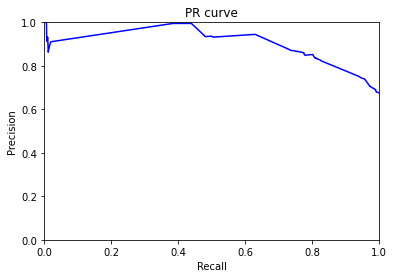

In [43]:
plot_precision_recall_curve(precisions, recalls)

In [44]:
fpr, tpr, _ = roc_curve(Y_test, clf_gs.predict_proba(X_test)[:,1])
auc(fpr, tpr)

0.8380040554655792

In [45]:
def plot_roc_curve(fpr, tpr, model, color=None) :
    model = model + ' (auc = %0.3f)' % auc(fpr, tpr)
    plt.plot(fpr, tpr, label=model, color=color)
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.axis([0,1,0,1])
    plt.xlabel('FPR (1 - specificity)')
    plt.ylabel('TPR (recall)')
    plt.title('ROC curve')
    plt.legend(loc="lower right")

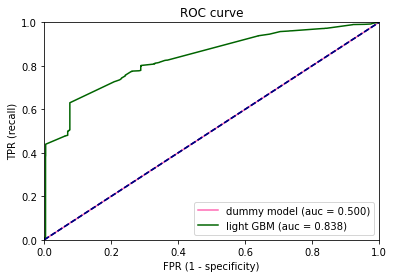

In [46]:
fpr_dummy, tpr_dummy, _ = roc_curve(Y_test, 
                                    dummy.predict_proba(X_test)[:,1])
plot_roc_curve(fpr_dummy, tpr_dummy, 'dummy model', 'hotpink')
fpr_tree, tpr_tree, _ = roc_curve(Y_test, 
                                  clf_gs.predict_proba(X_test)[:,1])
plot_roc_curve(fpr_tree, tpr_tree, 'light GBM', 'darkgreen')

In [47]:
human_new = pd.read_csv("work/human_new.csv", encoding="cp949")
s1=human_new['자본 이득']
s2=human_new['자본 손실']
s=s1+s2
s.rename("순이익",inplace=True)
human_new = pd.concat([human_new,s],axis=1)

In [48]:
human_new['나이대'] = (human_new['나이']/10).astype(int)
human_new['주당 시간별'] = (human_new['주당 시간']/10).astype(int)
human_new['fnlwgt2'] = (human_new['fnlwgt']/10000).astype(int)

In [49]:
# working_class = pd.get_dummies(human_new["노동 계급"])
# human_new = pd.concat([human_new, working_class], axis=1)
# human_new.drop("노동 계급", axis=1, inplace=True)

human_new[["노동 계급"]] = human_new[["노동 계급"]].apply(lambda x: x.str.lstrip())
human_new[["노동 계급"]] = human_new[["노동 계급"]].apply(lambda x: x.astype('category').cat.codes)

In [50]:
# academic_ability = pd.get_dummies(human_new["학력"])
# human_new = pd.concat([human_new,academic_ability],axis=1)
# human_new.drop("학력",axis=1,inplace=True)

human_new[["학력"]] = human_new[["학력"]].apply(lambda x: x.str.lstrip())
human_new[["학력"]] = human_new[["학력"]].apply(lambda x: x.astype('category').cat.codes)

In [51]:
# marital_status = pd.get_dummies(human_new["혼인 상태"])
# human_new = pd.concat([human_new,marital_status], axis=1)
# human_new.drop("혼인 상태", axis=1, inplace=True)

human_new[["혼인 상태"]] = human_new[["혼인 상태"]].apply(lambda x: x.str.lstrip())
human_new[["혼인 상태"]] = human_new[["혼인 상태"]].apply(lambda x: x.astype('category').cat.codes)

In [52]:
# jobs = pd.get_dummies(human_new["직업"])
# human_new = pd.concat([human_new, jobs], axis=1)
# human_new.drop("직업", axis=1, inplace=True)

human_new[["직업"]] = human_new[["직업"]].apply(lambda x: x.str.lstrip())
human_new[["직업"]] = human_new[["직업"]].apply(lambda x: x.astype('category').cat.codes)

In [53]:
# relationship = pd.get_dummies(human_new["관계"])
# human_new = pd.concat([human_new, relationship], axis=1)
# human_new.drop("관계", axis=1, inplace=True)

human_new[["관계"]] = human_new[["관계"]].apply(lambda x: x.str.lstrip())
human_new[["관계"]] = human_new[["관계"]].apply(lambda x: x.astype('category').cat.codes)

In [54]:
# race = pd.get_dummies(human_new["인종"])
# human_new = pd.concat([human_new, race], axis=1)
# human_new.drop("인종", axis=1, inplace=True)

human_new[["인종"]] = human_new[["인종"]].apply(lambda x: x.str.lstrip())
human_new[["인종"]] = human_new[["인종"]].apply(lambda x: x.astype('category').cat.codes)

In [55]:
# homeland = pd.get_dummies(human_new["모국"])
# human_new = pd.concat([human_new, homeland], axis=1)
# human_new.drop("모국", axis=1, inplace=True)
# human_new["Holand-Netherlands"]=human_new[" Yugoslavia"]
# human_new.loc[:,["Holand-Netherlands"]]=0

human_new[["모국"]] = human_new[["모국"]].apply(lambda x: x.str.lstrip())
human_new[["모국"]] = human_new[["모국"]].apply(lambda x: x.astype('category').cat.codes)

In [56]:
human_new.drop(["자본 이득","자본 손실","순이익"],axis=1,inplace=True)

In [57]:
human_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16281 entries, 0 to 16280
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   아이디      16281 non-null  object
 1   나이       16281 non-null  int64 
 2   노동 계급    16281 non-null  int8  
 3   fnlwgt   16281 non-null  int64 
 4   학력       16281 non-null  int8  
 5   교육 수     16281 non-null  int64 
 6   혼인 상태    16281 non-null  int8  
 7   직업       16281 non-null  int8  
 8   관계       16281 non-null  int8  
 9   인종       16281 non-null  int8  
 10  주당 시간    16281 non-null  int64 
 11  모국       16281 non-null  int8  
 12  나이대      16281 non-null  int32 
 13  주당 시간별   16281 non-null  int32 
 14  fnlwgt2  16281 non-null  int32 
dtypes: int32(3), int64(4), int8(7), object(1)
memory usage: 938.2+ KB


In [58]:
ndf = human_new.copy()
ndf.head()

,아이디,나이,노동 계급,fnlwgt,학력,교육 수,혼인 상태,직업,관계,인종,주당 시간,모국,나이대,주당 시간별,fnlwgt2
0,H00001,25,3,226802,1,7,4,6,3,2,40,37,2,4,22
1,H00002,38,3,89814,11,9,2,4,0,4,50,37,3,5,8
2,H00003,28,1,336951,7,12,2,10,0,4,40,37,2,4,33
3,H00004,44,3,160323,15,10,2,6,0,2,40,37,4,4,16
4,H00005,18,-1,103497,15,10,4,-1,3,4,30,37,1,3,10


In [59]:
ndf['성별'] = clf_gs.predict(ndf.loc[:, '나이':'fnlwgt2'])

In [60]:
ndf.shape

(16281, 16)

In [61]:
ndf_rename=ndf[['아이디','성별']]

In [62]:
ndf_rename = ndf_rename.rename(columns={'아이디':'ID', '성별':'SEX'})
ndf_rename.head()

,ID,SEX
0,H00001,0
1,H00002,1
2,H00003,1
3,H00004,1
4,H00005,0


In [63]:
ndf_rename.to_csv('submission_human.csv', encoding='cp949', index=False)

In [64]:
ndf_rename.shape

(16281, 2)

In [68]:
human_train.corr()

,나이,노동 계급,fnlwgt,학력,교육 수,혼인 상태,직업,관계,인종,성별,자본 이득,자본 손실,주당 시간,모국,순이익,나이대,주당 시간별,fnlwgt2
나이,1.000000,0.003787,-0.076646,-0.010508,0.036527,-0.266288,-0.020947,-0.263698,0.028718,0.088832,0.077674,0.057775,0.068756,-0.001151,0.080846,0.977993,0.064680,-0.076616
노동 계급,0.003787,1.000000,-0.016656,0.023513,0.052085,-0.064731,0.254892,-0.090461,0.049742,0.095981,0.033835,0.012216,0.138962,-0.007690,0.034510,0.003189,0.132823,-0.016573
fnlwgt,-0.076646,-0.016656,1.000000,-0.028145,-0.043195,0.028153,0.001597,0.008931,-0.021291,0.026858,0.000432,-0.010252,-0.018768,-0.051966,-0.000128,-0.075656,-0.014272,0.999628
학력,-0.010508,0.023513,-0.028145,1.000000,0.359153,-0.038407,-0.021260,-0.010876,0.014131,-0.027356,0.030046,0.016746,0.055510,0.064288,0.030967,0.005547,0.053853,-0.028413
교육 수,0.036527,0.052085,-0.043195,0.359153,1.000000,-0.069304,0.109697,-0.094153,0.031838,0.012280,0.122630,0.079923,0.148123,0.050840,0.127021,0.039924,0.142033,-0.043218
혼인 상태,-0.266288,-0.064731,0.028153,-0.038407,-0.069304,1.000000,-0.009654,0.185451,-0.068013,-0.129314,-0.043393,-0.034187,-0.190519,-0.023819,-0.045270,-0.260127,-0.189112,0.028357
직업,-0.020947,0.254892,0.001597,-0.021260,0.109697,-0.009654,1.000000,-0.075607,0.006763,0.080296,0.025505,0.017987,0.080383,-0.012543,0.026492,-0.020454,0.073154,0.001402
관계,-0.263698,-0.090461,0.008931,-0.010876,-0.094153,0.185451,-0.075607,1.000000,-0.116055,-0.582454,-0.057919,-0.061062,-0.248974,-0.005507,-0.061266,-0.259224,-0.250568,0.008771
인종,0.028718,0.049742,-0.021291,0.014131,0.031838,-0.068013,0.006763,-0.116055,1.000000,0.087204,0.011145,0.018899,0.041910,0.137852,0.012179,0.026929,0.033926,-0.021480
성별,0.088832,0.095981,0.026858,-0.027356,0.012280,-0.129314,0.080296,-0.582454,0.087204,1.000000,0.048480,0.045567,0.229309,-0.008119,0.050978,0.087623,0.235689,0.026947


In [101]:
a=human_train.corr().성별.sort_values(ascending=False)

In [54]:
human_train['나이'] = (human_train['나이']/10).astype(int)

In [102]:
a=pd.DataFrame({"수치":a})

In [114]:
a.info()

<class 'pandas.core.frame.DataFrame'>
Index: 115 entries, 성별 to 관계
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   수치      115 non-null    float64
dtypes: float64(1)
memory usage: 1.8+ KB


In [113]:
for i,v in enumerate(a['수치']):
    if ((v>-1.0) and (v<1.0)) :
        print(v)

0.5801352648003859
0.43180545811342946
0.23568946222608525
0.2293091490264182
0.22312817750275654
0.13246788820685695
0.10745142628229438
0.10348624694398598
0.10009723650965793
0.09598083475032537
0.09402582601874208
0.08883173120974484
0.08762274910394074
0.08720430156363829
0.08401528263720216
0.08029644294812227
0.06476990040727498
0.05097797284054917
0.048793147111447305
0.048479646868691675
0.045567354678684426
0.036729116751779145
0.03129314968865496
0.03050199157934993
0.02952536095137569
0.026947031230594526
0.0268580452698733
0.026836574562376734
0.026046443254430143
0.02513316234783888
0.016968752680404178
0.013630536608212467
0.012280054339657419
0.011690465756782295
0.011684471462180306
0.011187318018610967
0.010050485108158796
0.00990169337152947
0.008879534658810688
0.008722291556379977
0.00675287184158819
0.005333360649173363
0.005187288259542612
0.0043446299626606006
0.0030875206952258472
0.0022586236466299306
0.0017255605790154084
0.0016226092120311902
0.0014368990593

,수치
성별,1.000000
Husband,0.580135
Married-civ-spouse,0.431805
주당 시간별,0.235689
주당 시간,0.229309
...,...
Divorced,-0.228621
Adm-clerical,-0.263148
Wife,-0.319311
Unmarried,-0.321273


In [100]:
for i,v in enumerate(a[['1']]):
    #if (v<1) and (v>-1) :
        print(v)

1


In [56]:
human_train['나이'].value_counts()

3    8613
2    8054
4    7175
5    4418
6    2015
1    1657
7     508
8      78
9      43
Name: 나이, dtype: int64

In [53]:
a.value_counts()

3    8613
2    8054
4    7175
5    4418
6    2015
1    1657
7     508
8      78
9      43
Name: 나이, dtype: int64

In [4]:
human_train['나이'].describe()

count    32561.000000
mean        38.581647
std         13.640433
min         17.000000
25%         28.000000
50%         37.000000
75%         48.000000
max         90.000000
Name: 나이, dtype: float64

In [66]:
human_train['fnlwgt'].value_counts()

18     1852
19     1815
17     1758
16     1537
20     1483
       ... 
116       1
148       1
88        1
118       1
95        1
Name: fnlwgt, Length: 99, dtype: int64

In [6]:
human_train.columns

Index(['아이디', '나이', '노동 계급', 'fnlwgt', '학력', '교육 수', '혼인 상태', '직업', '관계', '인종',
       '성별', '자본 이득', '자본 손실', '주당 시간', '모국'],
      dtype='object')

In [7]:
human_train['교육 수'].value_counts()

9     10501
10     7291
13     5355
14     1723
11     1382
7      1175
12     1067
6       933
4       646
15      576
5       514
8       433
16      413
3       333
2       168
1        51
Name: 교육 수, dtype: int64

In [8]:
human_train['자본 이득'].value_counts()

0        29849
15024      347
7688       284
7298       246
99999      159
         ...  
4931         1
1455         1
6097         1
22040        1
1111         1
Name: 자본 이득, Length: 119, dtype: int64

In [9]:
human_train['자본 손실'].value_counts()

0       31042
1902      202
1977      168
1887      159
1848       51
        ...  
1411        1
1539        1
2472        1
1944        1
2201        1
Name: 자본 손실, Length: 92, dtype: int64

In [58]:
human_train['주당 시간'].sort_values()

19750     1
25078     1
11451     1
8447      1
32525     1
         ..
25806    99
30610    99
10143    99
4308     99
1887     99
Name: 주당 시간, Length: 32561, dtype: int64

In [59]:
human_train['주당 시간']

0        40
1        13
2        40
3        40
4        40
         ..
32556    38
32557    40
32558    40
32559    20
32560    40
Name: 주당 시간, Length: 32561, dtype: int64

In [64]:
human_train['fnlwgt'] = (human_train['fnlwgt']/10000).astype(int)

In [ ]:
human_new[["관계"]] = human_new[["관계"]].apply(lambda x: x.str.lstrip())
human_new[["관계"]] = human_new[["관계"]].apply(lambda x: x.astype('category').cat.codes)